In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
#!pip install imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Loading Data & Initial Analysis

In [204]:
data_train = pd.read_csv('Datasets/Employee Promotion/train.csv')
data_test = pd.read_csv('Datasets/Employee Promotion/test.csv')

In [205]:
data_train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [206]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [207]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [208]:
print(f'Train Shape: {data_train.shape}')
print(f'Test Shape: {data_test.shape}')

Train Shape: (54808, 13)
Test Shape: (23490, 12)


In [209]:
#Checking for Null Values
data_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [210]:
data_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [211]:
data_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [212]:
#defining the categorical and numerical columns
category_list = ['department','education','gender','recruitment_channel','awards_won?','previous_year_rating']
num_list = ['no_of_trainings','age','length_of_service','avg_training_score']

Checking for uniques values of all the categorical columns

In [213]:
for col in category_list:
  print("Category is: ",col)
  print("-"*55)
  print(f'Unique Values: {data_train[col].unique()}')
  print(f'Number of Uniques: {data_train[col].nunique()}')
  print(data_train[col].value_counts())
  print("\n")

Category is:  department
-------------------------------------------------------
Unique Values: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
Number of Uniques: 9
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


Category is:  education
-------------------------------------------------------
Unique Values: ["Master's & above" "Bachelor's" nan 'Below Secondary']
Number of Uniques: 3
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


Category is:  gender
-------------------------------------------------------
Unique Values: ['f' 'm']
Number of Uniques: 2
m    38496
f    16312
Name: gender, dtype: int64


Category is:  recruitment_channel
-------------

In [214]:
#Target Column distribution
data_train['is_promoted'].value_counts(normalize= True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

# Visualization

In [215]:
data_train2 = data_train.copy().dropna()

<AxesSubplot:>

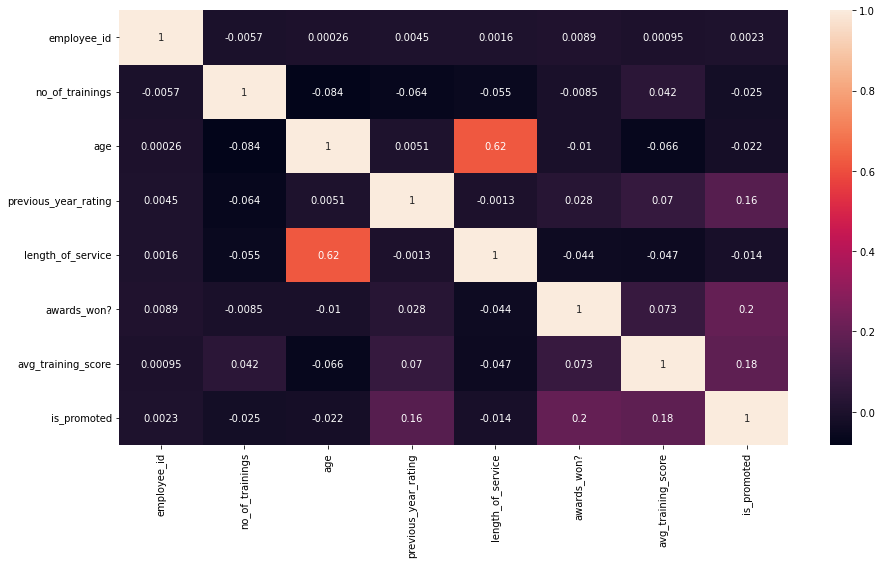

In [216]:
plt.figure(figsize= (15,8))
sns.heatmap(data_train2.corr(), annot= True)

From the above correlations we can see that there is no strong correlation between the target and the predictors

## Univariate Analysis

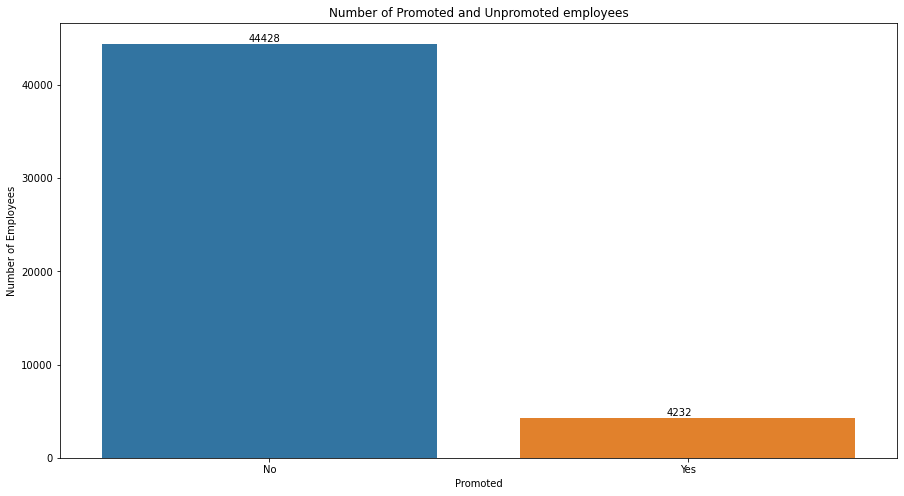

In [217]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data_train2['is_promoted'])

for p in ax.patches:
    height = p.get_height()
    # Add text to the axes
    ax.text(p.get_x()+p.get_width()/2 - 0.05, height + 250, height)

ax.set_xlabel('Promoted')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Promoted and Unpromoted employees');

## Bivariate Analysis 

#### 1. Gender

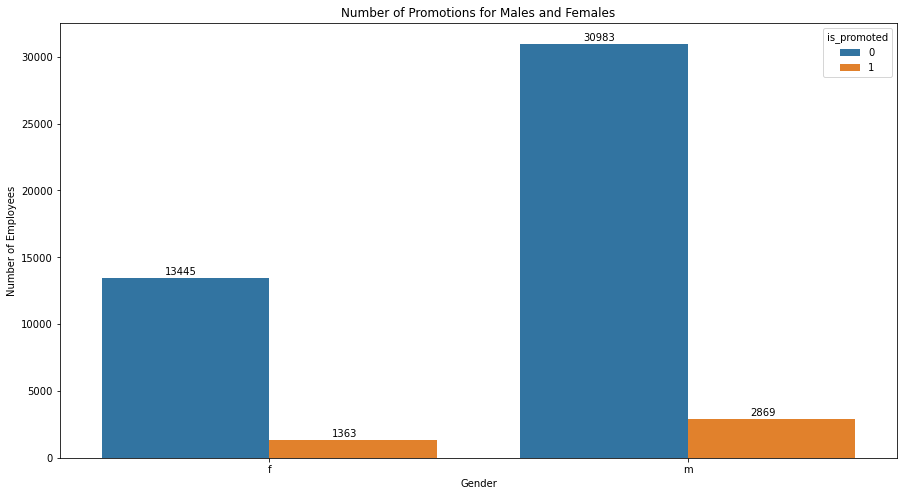

In [218]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='gender',hue='is_promoted',data=data_train2)
ax.set_title('Number of Promotions for Males and Females');
ax.set_xlabel('Gender');
ax.set_ylabel('Number of Employees');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 250, height)

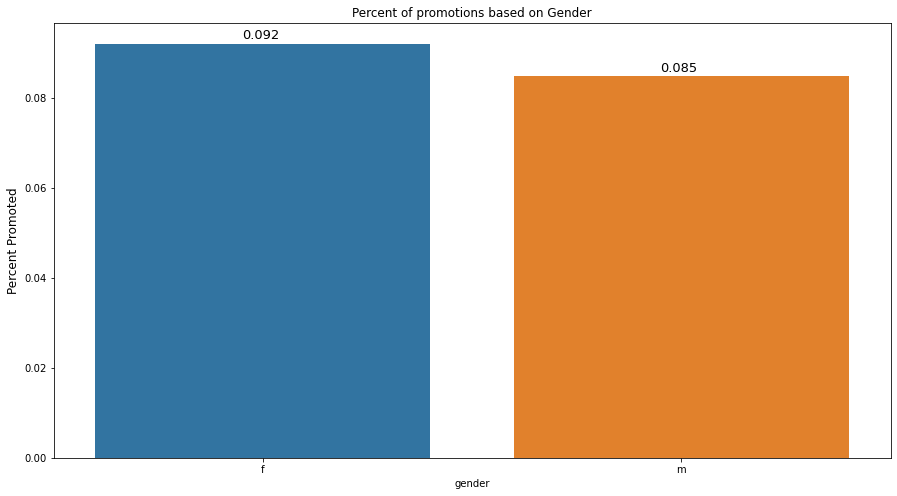

In [219]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "gender", y = "is_promoted", data = data_train2, ci = None)
plt.ylabel("Percent Promoted", fontsize= 12)
plt.title('Percent of promotions based on Gender')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

We can see that there is a slight difference in the percentage of promotions done based on gender

#### 2. Education

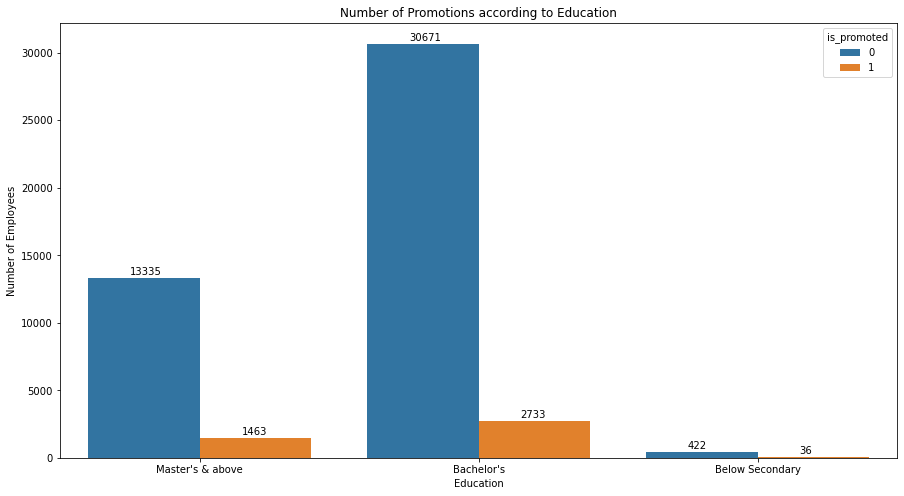

In [220]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='education',hue='is_promoted',data=data_train2)
ax.set_title('Number of Promotions according to Education');
ax.set_xlabel('Education');
ax.set_ylabel('Number of Employees');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 250, height)


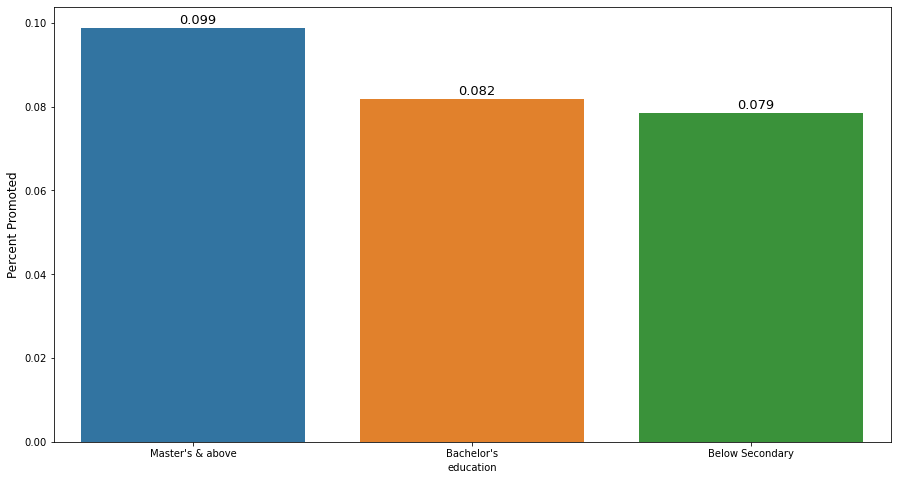

In [221]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "education", y = "is_promoted", data = data_train2, ci = None)
plt.ylabel("Percent Promoted", fontsize= 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

Masters and above have the higher percent of being promoted

#### 3. Department

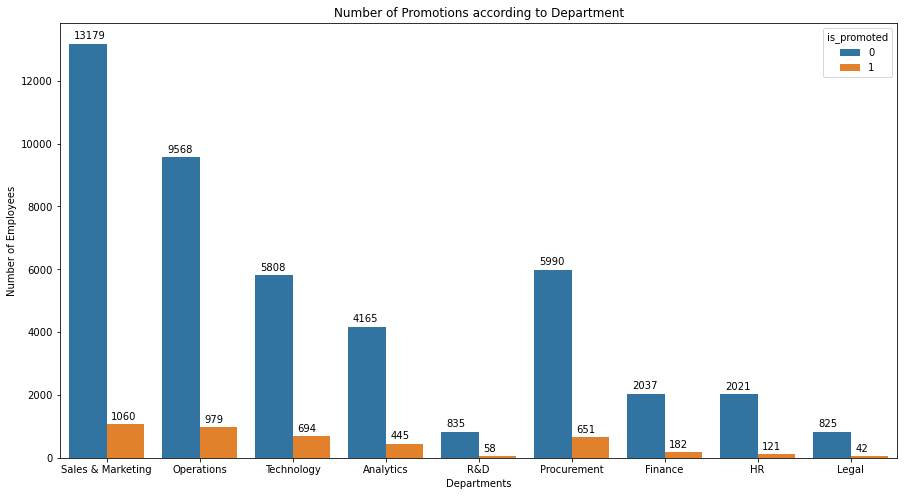

In [222]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='department',hue='is_promoted',data=data_train2)
ax.set_title('Number of Promotions according to Department');
ax.set_xlabel('Departments');
ax.set_ylabel('Number of Employees');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.15, height + 150, height)

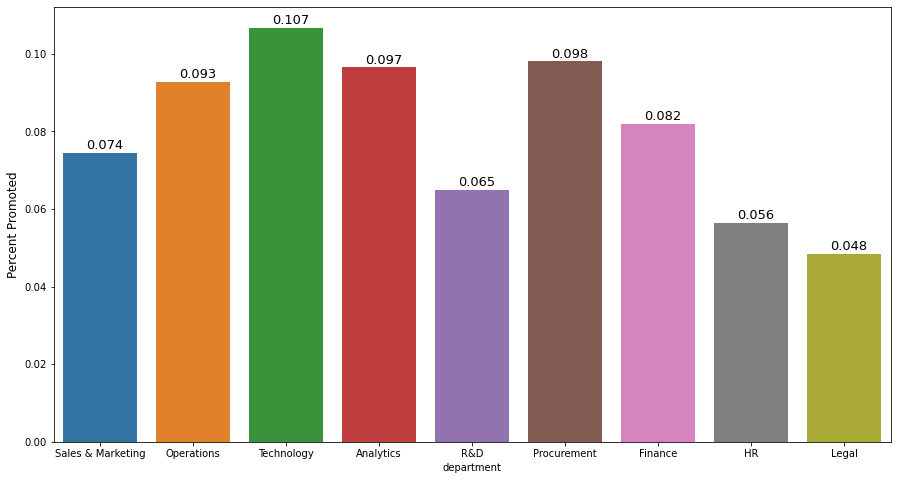

In [223]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "department", y = "is_promoted", data = data_train2, ci = None)
plt.ylabel("Percent Promoted", fontsize= 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.15, height + 0.001, "%.3f" %(height), fontsize =13)

#### 4. Recruitment Channel

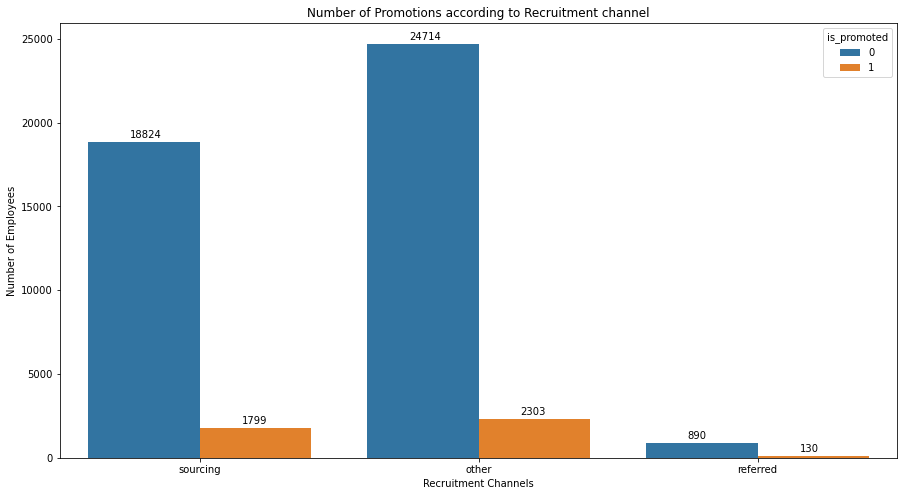

In [224]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='recruitment_channel',hue='is_promoted',data=data_train2)
ax.set_title('Number of Promotions according to Recruitment channel');
ax.set_xlabel('Recruitment Channels');
ax.set_ylabel('Number of Employees');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 250, height)

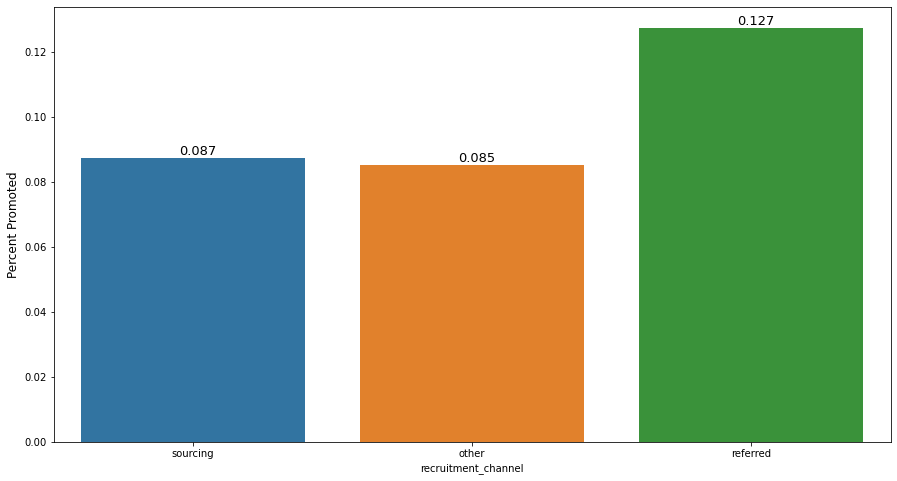

In [225]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "recruitment_channel", y = "is_promoted", data = data_train2, ci = None)
plt.ylabel("Percent Promoted", fontsize= 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

#### 5. Awards Won

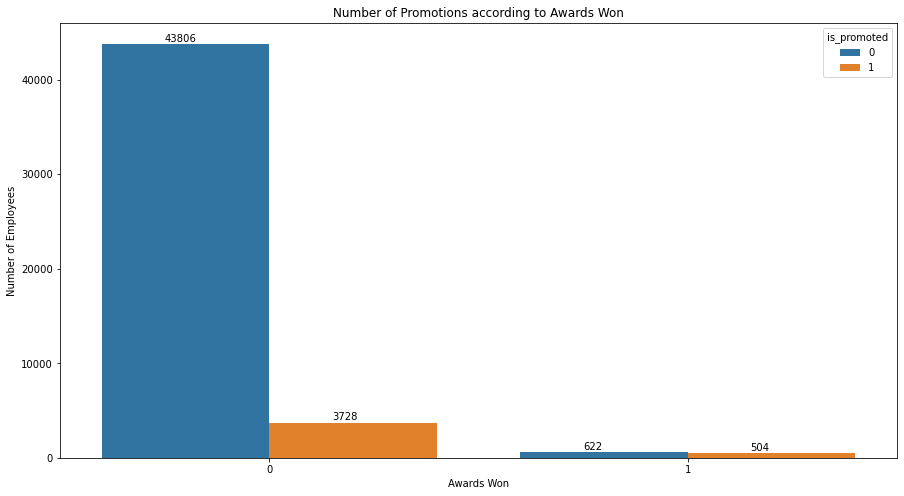

In [226]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='awards_won?',hue='is_promoted',data=data_train2)
ax.set_title('Number of Promotions according to Awards Won');
ax.set_xlabel('Awards Won');
ax.set_ylabel('Number of Employees');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 250, height)

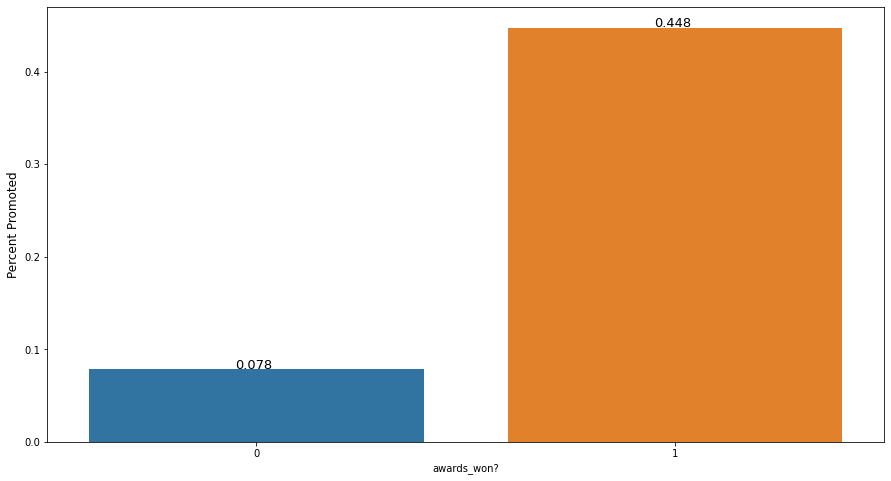

In [227]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "awards_won?", y = "is_promoted", data = data_train2, ci = None)
plt.ylabel("Percent Promoted", fontsize= 12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

Employees who won the awards among them 44% were promoted

There is a very high percentage for employees who won the award to be promoted than those who didn't receive the award

## Trivariate Analysis 

#### 1. Gender and Education

In [228]:
data_train2[['gender','education','is_promoted']].groupby(['gender','education'],as_index=False).mean()
data_train2.groupby(by=['gender','education']).mean()

employee_id  no_of_trainings        age  \
gender education                                                    
f      Bachelor's        39313.474163         1.175447  34.028314   
       Below Secondary   37143.110429         1.184049  23.773006   
       Master's & above  39295.530067         1.170101  39.327166   
m      Bachelor's        39054.253413         1.304912  34.052987   
       Below Secondary   39233.111864         1.325424  24.291525   
       Master's & above  39267.816072         1.241187  39.478092   

                         previous_year_rating  length_of_service  awards_won?  \
gender education                                                                
f      Bachelor's                    3.362929           5.811811     0.022753   
       Below Secondary               3.447853           2.202454     0.024540   
       Master's & above              3.416106           7.710892     0.022288   
m      Bachelor's                    3.308059           5.751265     0.023559   
       Below Secondary               3.518644           2.257627     0.023729   
       Master's & above              3.337184           7.638817     0.022904   

                         avg_training_score  is_promoted  
gender education                                          
f      Bachelor's                 63.834058     0.086055  
       Below Secondary            64.944785     0.067485  
       Master's & above           64.191968     0.105341  
m      Bachelor's                 63.220540     0.080034  
       Below Secondary            64.738983     0.084746  
       Master's & above           63.938458     0.095798

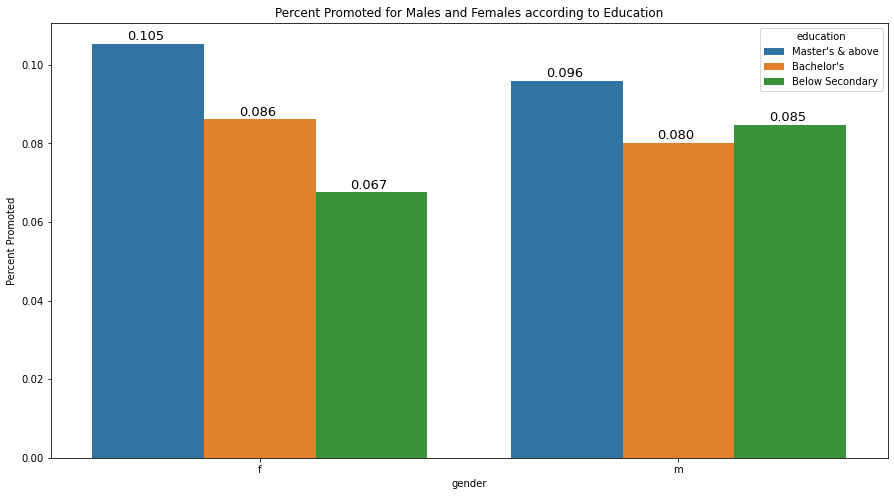

In [229]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='gender',y='is_promoted',hue='education',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Males and Females according to Education');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

Masters and above for both the genders have highest percentage of being promoted

For females its the bachelors which comes at the second place whereas
for males its the below secondary which comes at the second place

We can also see that females have a slight higher percentages of promotions even when compared based on education.
We had already check above the promotions based on gender

.

#### 2. Gender and Department

In [230]:
data_train2[['gender','department','is_promoted']].groupby(['gender','department'],as_index=False).mean()
data_train2.groupby(by=['gender','department']).mean()

employee_id  no_of_trainings        age  \
gender department                                                    
f      Analytics          39069.195294         1.261176  30.112941   
       Finance            39841.003396         1.171477  32.572156   
       HR                 40080.435268         1.017857  35.510045   
       Legal              36003.049180         1.114754  33.696721   
       Operations         39296.154110         1.135388  36.586073   
       Procurement        39473.876757         1.206277  36.394246   
       R&D                39437.921569         1.156863  32.588235   
       Sales & Marketing  38960.156273         1.204496  35.275925   
       Technology         39164.724684         1.212025  35.197785   
m      Analytics          39216.100358         1.351016  33.425806   
       Finance            39898.185276         1.351534  32.770552   
       HR                 40484.111557         1.078652  35.239165   
       Legal              38551.339597         1.088591  35.135570   
       Operations         38987.290417         1.182585  36.616345   
       Procurement        39499.078169         1.401731  36.517588   
       R&D                38264.426366         1.409739  33.399050   
       Sales & Marketing  38973.380542         1.298232  36.082310   
       Technology         38840.519879         1.288878  35.725214   

                          previous_year_rating  length_of_service  \
gender department                                                   
f      Analytics                      3.552941           4.392941   
       Finance                        3.519525           5.405772   
       HR                             3.541295           6.234375   
       Legal                          3.459016           4.811475   
       Operations                     3.677169           6.735388   
       Procurement                    3.366133           6.672442   
       R&D                            3.725490           4.392157   
       Sales & Marketing              3.026106           6.276650   
       Technology                     3.143987           6.263449   
m      Analytics                      3.561051           5.481959   
       Finance                        3.502454           5.268098   
       HR                             3.443820           6.197432   
       Legal                          3.394631           5.381208   
       Operations                     3.603048           6.729204   
       Procurement                    3.242881           6.665550   
       R&D                            3.558195           4.970309   
       Sales & Marketing              3.088930           6.491595   
       Technology                     3.173377           6.357826   

                          awards_won?  avg_training_score  is_promoted  
gender department                                                       
f      Analytics             0.025882           84.524706     0.124706  
       Finance               0.033956           60.106961     0.079796  
       HR                    0.017857           49.956473     0.059152  
       Legal                 0.024590           59.663934     0.040984  
       Operations            0.022831           60.326484     0.096804  
       Procurement           0.024845           70.234063     0.120628  
       R&D                   0.000000           84.666667     0.098039  
       Sales & Marketing     0.015954           50.071429     0.056200  
       Technology            0.025712           80.016218     0.099684  
m      Analytics             0.023417           84.590442     0.093668  
       Finance               0.023313           60.304294     0.082822  
       HR                    0.019262           50.100321     0.054575  
       Legal                 0.026846           59.800000     0.049664  
       Operations            0.024323           60.197827     0.089995  
       Procurement           0.023451           70.054718     0.078727  
    

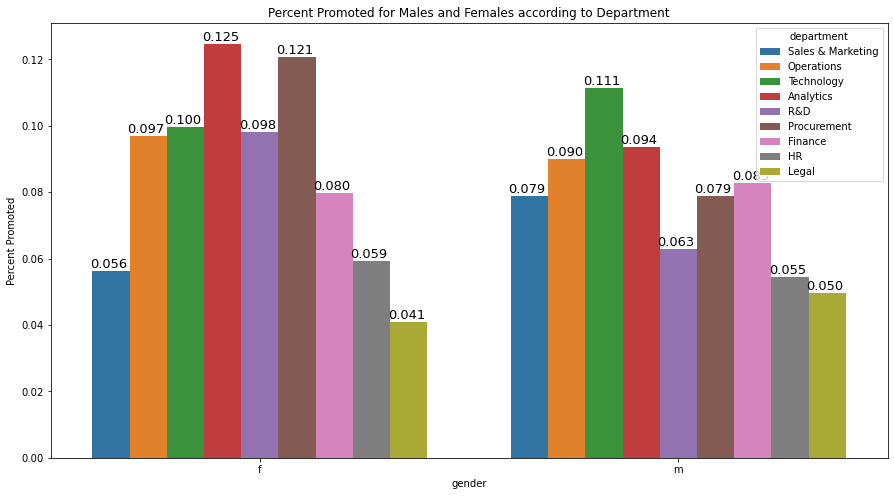

In [231]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='gender',y='is_promoted',hue='department',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Males and Females according to Department');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

#### 3. Gender and Recruitment Channel

In [232]:
data_train2[['gender','recruitment_channel','is_promoted']].groupby(['gender','recruitment_channel'],as_index=False).mean()
data_train2.groupby(by=['gender','recruitment_channel']).mean()

employee_id  no_of_trainings        age  \
gender recruitment_channel                                             
f      other                39255.468029         1.179137  35.687296   
       referred             39862.246429         1.128571  34.846429   
       sourcing             39295.427338         1.168825  35.559233   
m      other                39052.033344         1.295081  35.707320   
       referred             38723.056757         1.208108  32.718919   
       sourcing             39227.141634         1.278605  35.554774   

                            previous_year_rating  length_of_service  \
gender recruitment_channel                                            
f      other                            3.371933           6.395987   
       referred                         3.882143           6.178571   
       sourcing                         3.370424           6.372662   
m      other                            3.296948           6.305058   
       referred                         3.967568           5.170270   
       sourcing                         3.313266           6.306236   

                            awards_won?  avg_training_score  is_promoted  
gender recruitment_channel                                                
f      other                   0.023692           63.901608     0.089689  
       referred                0.021429           67.610714     0.146429  
       sourcing                0.021263           63.876739     0.092726  
m      other                   0.024008           63.464629     0.083280  
       referred                0.025676           65.983784     0.120270  
       sourcing                0.022411           63.292734     0.084841

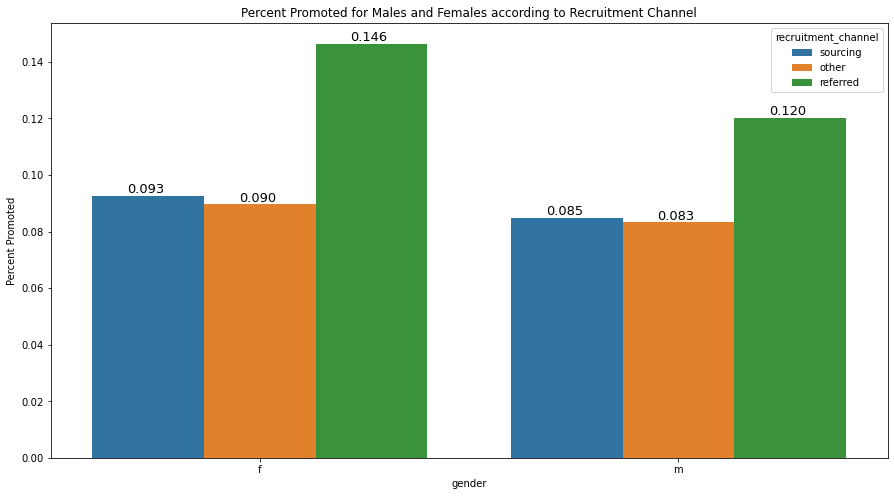

In [233]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='gender',y='is_promoted',hue='recruitment_channel',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Males and Females according to Recruitment Channel');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

#### 4. Gender and Awards Won

In [234]:
data_train2[['gender','awards_won?','is_promoted']].groupby(['gender','awards_won?'],as_index=False).mean()
data_train2.groupby(by=['gender','awards_won?']).mean()

employee_id  no_of_trainings        age  \
gender awards_won?                                             
f      0            39242.659711         1.174463  35.630484   
       1            41062.089552         1.146269  35.047761   
m      0            39092.661081         1.287075  35.588700   
       1            40226.900126         1.249052  35.098609   

                    previous_year_rating  length_of_service  \
gender awards_won?                                            
f      0                        3.375527           6.411456   
       1                        3.614925           5.110448   
m      0                        3.313118           6.308551   
       1                        3.544880           5.118837   

                    avg_training_score  is_promoted  
gender awards_won?                                   
f      0                     63.812340     0.083673  
       1                     70.394030     0.453731  
m      0                     63.296996     0.076132  
       1                     69.705436     0.445006

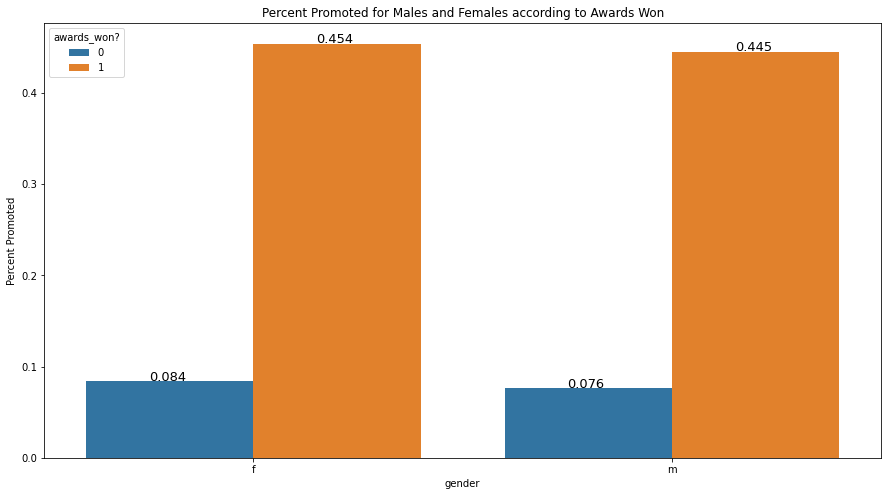

In [235]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='gender',y='is_promoted',hue='awards_won?',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Males and Females according to Awards Won');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

Awards won has always the higher percent of employees being promoted

#### 5. Education and Department

In [236]:
data_train2[['education','department','is_promoted']].groupby(['education','department'],as_index=False).mean()
data_train2.groupby(by=['education','department']).mean()

employee_id  no_of_trainings        age  \
education        department                                                    
Bachelor's       Analytics          39328.319588         1.355809  32.001393   
                 Finance            39533.871532         1.308203  31.776840   
                 HR                 40362.992554         1.052867  33.214445   
                 Legal              38308.265276         1.095380  33.698957   
                 Operations         39054.502055         1.169910  35.210469   
                 Procurement        39580.540594         1.356683  34.327475   
                 R&D                37667.656566         1.438384  32.163636   
                 Sales & Marketing  38905.940245         1.291254  34.617234   
                 Technology         38955.496906         1.271299  33.560923   
Below Secondary  Finance            41769.606061         1.318182  24.287879   
                 HR                 40077.397059         1.073529  22.970588   
                 Legal              40500.575000         1.075000  26.200000   
                 Operations         38189.313131         1.252525  24.686869   
                 Procurement        33042.304348         1.463768  23.753623   
                 Technology         38494.431034         1.344828  23.663793   
Master's & above Analytics          38760.478942         1.296768  37.053869   
                 Finance            40800.888889         1.286869  36.993939   
                 HR                 40249.673051         1.051984  40.432285   
                 Legal              37104.173077         1.083333  42.480769   
                 Operations         39286.119683         1.144127  40.206349   
                 Procurement        39514.606635         1.235782  40.210900   
                 R&D                39157.012563         1.341709  34.831658   
                 Sales & Marketing  39129.568870         1.252723  39.128782   
                 Technology         39012.956960         1.230769  39.919414   

                                    previous_year_rating  length_of_service  \
education        department                                                   
Bachelor's       Analytics                      3.545834           5.000279   
                 Finance                        3.498191           4.921592   
                 HR                             3.413254           5.424423   
                 Legal                          3.387481           4.903130   
                 Operations                     3.621540           6.252809   
                 Procurement                    3.273020           5.897277   
                 R&D                            3.533333           4.541414   
                 Sales & Marketing              3.064602           5.987535   
                 Technology                     3.161114           5.665159   
Below Secondary  Finance                        3.515152           2.196970   
                 HR                             3.573529           2.073529   
                 Legal                          3.875000           2.150000   
                 Operations                     3.555556           2.494949   
                 Procurement                    3.217391           2.260870   
                 Technology                     3.413793           2.155172   
Master's & above Analytics                      3.611166           6.721841   
                 Finance                        3.535354           7.002020   
                 HR                             3.607387           8.046512   
                 Legal                          3.352564           7.820513   
                 Operations                     3.664762           7.974603   
                 Procurement                    3.344392           8.019747   
                 R&D                            3.610553           5.429648   
                 Sales & Marketing              3.106512    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


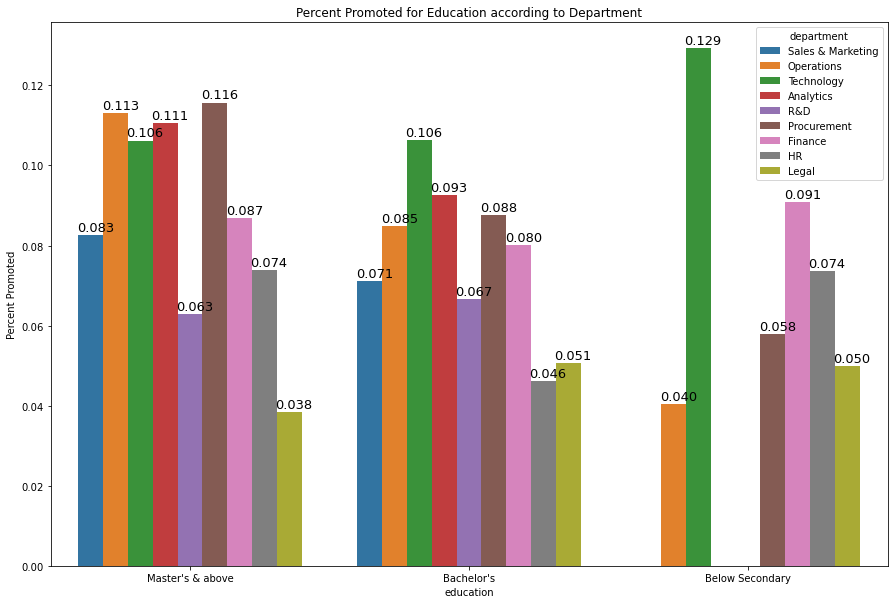

In [237]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='education',y='is_promoted',hue='department',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Education according to Department');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

#### 6. Education and Recruitment

In [238]:
data_train2[['education','recruitment_channel','is_promoted']].groupby(['education','recruitment_channel'],as_index=False).mean()
data_train2.groupby(by=['education','recruitment_channel']).mean()

employee_id  no_of_trainings  \
education        recruitment_channel                                  
Bachelor's       other                39081.383040         1.272772   
                 referred             39044.776233         1.204804   
                 sourcing             39200.478387         1.261972   
Below Secondary  other                37544.427386         1.298755   
                 referred             36050.210526         1.052632   
                 sourcing             39873.404040         1.267677   
Master's & above other                39232.864920         1.229179   
                 referred             39271.995238         1.128571   
                 sourcing             39335.114409         1.206957   

                                            age  previous_year_rating  \
education        recruitment_channel                                    
Bachelor's       other                34.153238              3.307071   
                 referred             32.158028              3.935525   
                 sourcing             34.010948              3.312615   
Below Secondary  other                24.174274              3.431535   
                 referred             23.157895              3.736842   
                 sourcing             24.116162              3.545455   
Master's & above other                39.468213              3.345151   
                 referred             38.533333              3.995238   
                 sourcing             39.408329              3.364449   

                                      length_of_service  awards_won?  \
education        recruitment_channel                                   
Bachelor's       other                         5.765592     0.024275   
                 referred                      5.060683     0.025284   
                 sourcing                      5.813462     0.021966   
Below Secondary  other                         2.211618     0.020747   
                 referred                      2.052632     0.000000   
                 sourcing                      2.287879     0.030303   
Master's & above other                         7.710492     0.023194   
                 referred                      7.209524     0.023810   
                 sourcing                      7.612733     0.022020   

                                      avg_training_score  is_promoted  
education        recruitment_channel                                   
Bachelor's       other                         63.394744     0.079978  
                 referred                      66.514539     0.121365  
                 sourcing                      63.237957     0.082003  
Below Secondary  other                         64.078838     0.049793  
                 referred                      73.947368     0.052632  
                 sourcing                      64.828283     0.116162  
Master's & above other                         64.036294     0.097945  
                 referred                      65.433333     0.157143  
                 sourcing                      63.950854     0.098133

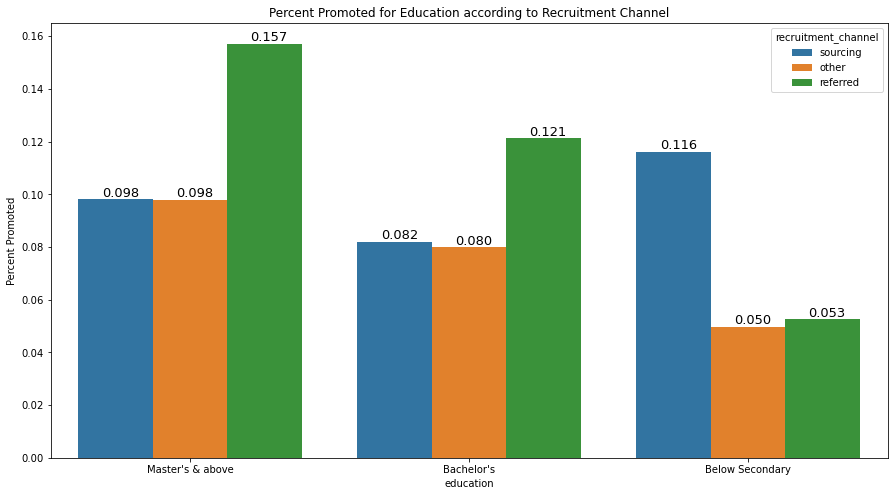

In [239]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='education',y='is_promoted',hue='recruitment_channel',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Education according to Recruitment Channel');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

For all the educational levels Referred recruitment channel has the higher percentage of promotions

#### 7. Education and Awards Won

In [240]:
data_train2[['education','awards_won?','is_promoted']].groupby(['education','awards_won?'],as_index=False).mean()
data_train2.groupby(by=['education','awards_won?']).mean()

employee_id  no_of_trainings        age  \
education        awards_won?                                             
Bachelor's       0            39101.962207         1.267586  34.057716   
                 1            40346.852375         1.224647  33.541720   
Below Secondary  0            38501.071588         1.275168  24.100671   
                 1            38010.545455         1.272727  24.363636   
Master's & above 0            39240.076476         1.218711  39.439358   
                 1            40854.059524         1.202381  39.008929   

                              previous_year_rating  length_of_service  \
education        awards_won?                                            
Bachelor's       0                        3.319080           5.792797   
                 1                        3.543004           4.780488   
Below Secondary  0                        3.489933           2.230425   
                 1                        3.636364           2.545455   
Master's & above 0                        3.356659           7.701079   
                 1                        3.616071           5.979167   

                              avg_training_score  is_promoted  
education        awards_won?                                   
Bachelor's       0                     63.264000     0.073931  
                 1                     69.188703     0.412067  
Below Secondary  0                     64.677852     0.073826  
                 1                     70.272727     0.272727  
Master's & above 0                     63.844489     0.088715  
                 1                     71.571429     0.535714

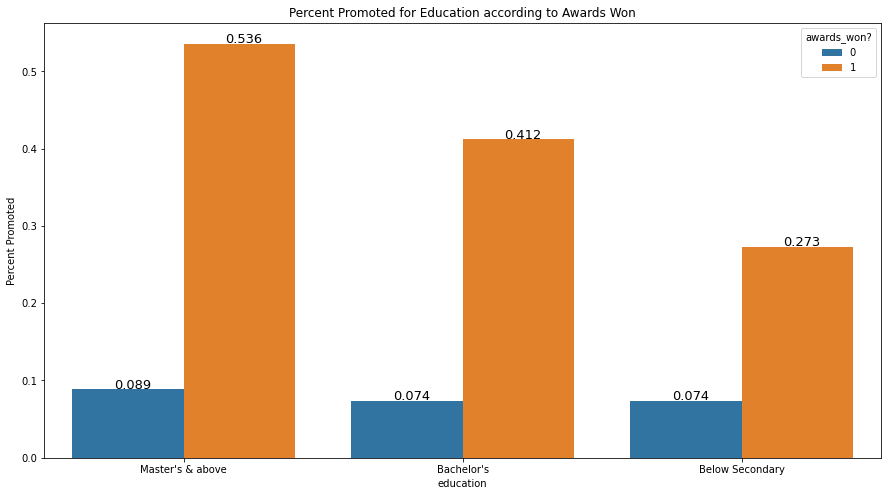

In [241]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='education',y='is_promoted',hue='awards_won?',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Education according to Awards Won');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

Masters education and Awards won have more than 50% chance of being promoted

#### 8. Department and Recruitment Channel

In [242]:
data_train2[['department','recruitment_channel','is_promoted']].groupby(['department','recruitment_channel'],as_index=False).mean()
data_train2.groupby(by=['department','recruitment_channel']).mean()

employee_id  no_of_trainings  \
department        recruitment_channel                                  
Analytics         other                39076.942601         1.340492   
                  referred             41639.500000         1.542857   
                  sourcing             39278.915109         1.338555   
Finance           other                40522.143194         1.294256   
                  referred             39011.750000         1.500000   
                  sourcing             39026.167373         1.315678   
HR                other                40634.455285         1.056911   
                  referred             41028.025316         1.025316   
                  sourcing             39776.325330         1.050420   
Legal             other                37655.049702         1.089463   
                  referred             34684.454545         1.181818   
                  sourcing             39068.274788         1.093484   
Operations        other                38952.678289         1.166953   
                  referred             40234.609442         1.188841   
                  sourcing             39268.614871         1.156500   
Procurement       other                39653.293896         1.309492   
                  referred             40168.605263         1.078947   
                  sourcing             39252.590654         1.320801   
R&D               other                38691.670683         1.407631   
                  referred             32235.176471         1.352941   
                  sourcing             38131.034392         1.380952   
Sales & Marketing other                38806.701916         1.300511   
                  referred             35775.187500         1.075893   
                  sourcing             39294.320938         1.261601   
Technology        other                38758.921295         1.271560   
                  referred             39653.000000         1.238562   
                  sourcing             39170.921163         1.244164   

                                             age  previous_year_rating  \
department        recruitment_channel                                    
Analytics         other                33.325654              3.538462   
                  referred             29.057143              3.900000   
                  sourcing             32.998484              3.576554   
Finance           other                32.878836              3.488592   
                  referred             28.500000              4.750000   
                  sourcing             32.519068              3.526483   
HR                other                35.214634              3.447154   
                  referred             34.164557              3.911392   
                  sourcing             35.668667              3.499400   
Legal             other                34.982107              3.397614   
                  referred             30.000000              3.727273   
                  sourcing             35.016997              3.402266   
Operations        other                36.724837              3.620062   
                  referred             35.515021              4.150215   
                  sourcing             36.503339              3.624889   
Procurement       other                36.440172              3.307878   
                  referred             35.092105              3.671053   
                  sourcing             36.524245              3.278988   
R&D               other                33.451807              3.600402   
                  referred             29.705882              4.235294   
                  sourcing             33.386243              3.494709   
Sales & Marketing other                36.099617              3.054917   
                  referred             32.401786              4.022321   
                  sourcing             35.834115              3.070170   
Technology        other    

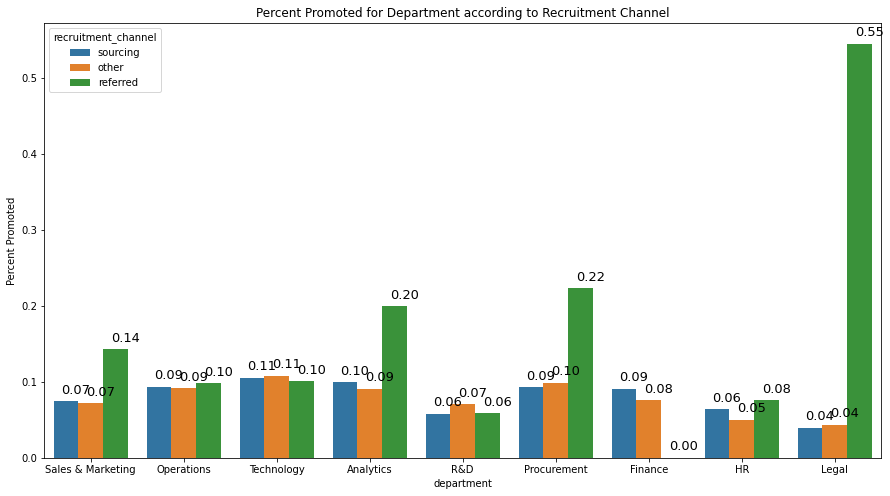

In [243]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='department',y='is_promoted',hue='recruitment_channel',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Department according to Recruitment Channel');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.01, "%.2f" %(height), fontsize =13)

Legal Department with Reffered Recruitment Channel has very high marginal percentage of promotions

#### 9. Department and Awards Won

In [244]:
data_train2[['department','awards_won?','is_promoted']].groupby(['department','awards_won?'],as_index=False).mean()
data_train2.groupby(by=['department','awards_won?']).mean()

employee_id  no_of_trainings        age  \
department        awards_won?                                             
Analytics         0            39189.096867         1.342591  33.129305   
                  1            39758.376147         1.348624  32.752294   
Finance           0            39835.161499         1.303100  32.775104   
                  1            41665.672414         1.327586  30.586207   
HR                0            40248.277355         1.053283  35.345385   
                  1            43834.850000         1.050000  35.725000   
Legal             0            38145.857820         1.092417  34.851896   
                  1            39913.739130         1.086957  37.913043   
Operations        0            39101.154025         1.164805  36.593959   
                  1            39708.768000         1.088000  37.008000   
Procurement       0            39431.305508         1.314612  36.481253   
                  1            41762.475000         1.193750  35.631250   
R&D               0            38443.961098         1.393593  33.355835   
                  1            33155.736842         1.473684  33.210526   
Sales & Marketing 0            38924.765406         1.280077  35.947772   
                  1            41110.626667         1.280000  34.920000   
Technology        0            38954.915391         1.259669  35.541121   
                  1            39408.748503         1.233533  34.724551   

                               previous_year_rating  length_of_service  \
department        awards_won?                                            
Analytics         0                        3.555432           5.397467   
                  1                        3.761468           4.724771   
Finance           0                        3.504396           5.332716   
                  1                        3.603448           4.258621   
HR                0                        3.477165           6.243102   
                  1                        3.875000           4.625000   
Legal             0                        3.408768           5.318720   
                  1                        3.217391           4.652174   
Operations        0                        3.632806           6.756628   
                  1                        3.676000           5.708000   
Procurement       0                        3.290079           6.704367   
                  1                        3.687500           5.225000   
R&D               0                        3.578947           4.951945   
                  1                        3.052632           4.263158   
Sales & Marketing 0                        3.072243           6.480666   
                  1                        3.286667           5.023333   
Technology        0                        3.148382           6.352644   
                  1                        3.676647           5.125749   

                               avg_training_score  is_promoted  
department        awards_won?                                   
Analytics         0                     84.560320     0.087536  
                  1                     85.577982     0.467890  
Finance           0                     60.070801     0.072189  
                  1                     67.000000     0.448276  
HR                0                     49.898668     0.049477  
                  1                     57.475000     0.425000  
Legal             0                     59.658768     0.043839  
                  1                     64.260870     0.217391  
Operations        0                     60.099252     0.083228  
                  1                     66.512000     0.488000  
Procurement       0                     69.987502     0.088875  
                  1                     76.206250     0.468750  
R&D               0                     84.616705     0.060641  
                  1                     83.631579     0.263158  
Sales & Ma

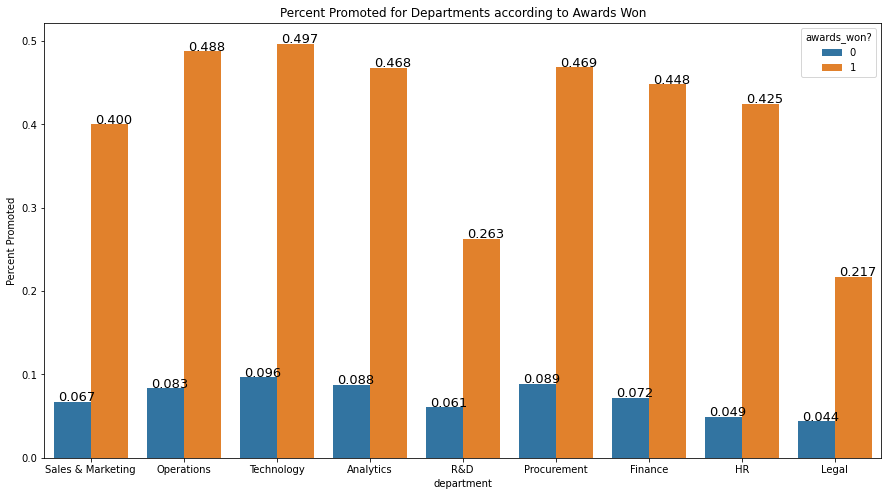

In [245]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='department',y='is_promoted',hue='awards_won?',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Departments according to Awards Won');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.15, height + 0.001, "%.3f" %(height), fontsize =13)

#### 10. Recruitment Channel and Awards Won

In [246]:
data_train2[['recruitment_channel','awards_won?','is_promoted']].groupby(['recruitment_channel','awards_won?'],as_index=False).mean()
data_train2.groupby(by=['recruitment_channel','awards_won?']).mean()

employee_id  no_of_trainings        age  \
recruitment_channel awards_won?                                             
other               0            39085.135907         1.260248  35.708240   
                    1            40306.007740         1.232198  35.413313   
referred            0            38821.111558         1.187940  33.293467   
                    1            47579.400000         1.120000  33.680000   
sourcing            0            39223.540113         1.246232  35.575615   
                    1            40325.520879         1.204396  34.692308   

                                 previous_year_rating  length_of_service  \
recruitment_channel awards_won?                                            
other               0                        3.313033           6.362064   
                    1                        3.600619           5.142415   
referred            0                        3.939698           5.475377   
                    1                        4.120000           4.320000   
sourcing            0                        3.327102           6.353530   
                    1                        3.485714           5.123077   

                                 avg_training_score  is_promoted  
recruitment_channel awards_won?                                   
other               0                     63.442190     0.076713  
                    1                     69.976780     0.433437  
referred            0                     66.222111     0.119598  
                    1                     74.720000     0.440000  
sourcing            0                     63.332656     0.078639  
                    1                     69.551648     0.468132

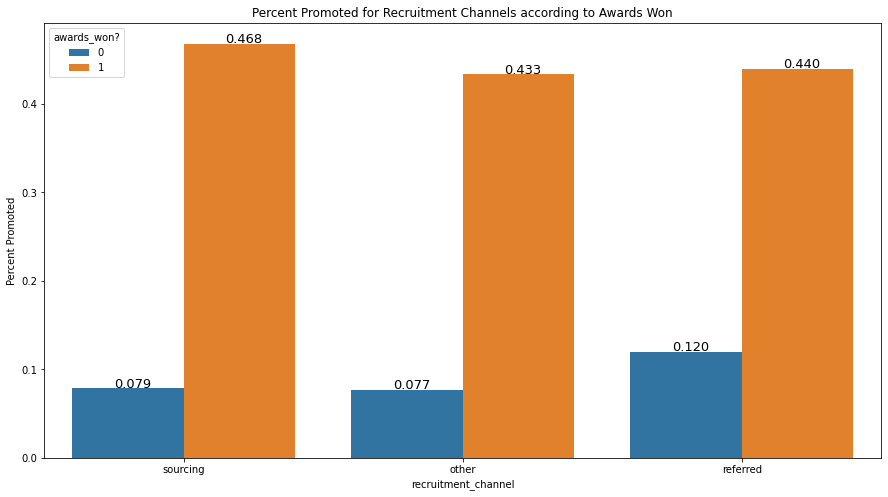

In [247]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='recruitment_channel',y='is_promoted',hue='awards_won?',data=data_train2,ci=None)
ax.set_ylabel('Percent Promoted')
ax.set_title('Percent Promoted for Recruitment Channels according to Awards Won');

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2 -0.05, height + 0.001, "%.3f" %(height), fontsize =13)

## Multivariate Analysis 

#### 1.Gender, Education and Awards Won

In [248]:
data_train2.groupby(by=['awards_won?','education','gender'])['is_promoted'].mean()

awards_won?  education         gender
0            Bachelor's        f         0.078228
                               m         0.072122
             Below Secondary   f         0.056604
                               m         0.083333
             Master's & above  f         0.095914
                               m         0.085304
1            Bachelor's        f         0.422222
                               m         0.407942
             Below Secondary   f         0.500000
                               m         0.142857
             Master's & above  f         0.518868
                               m         0.543478
Name: is_promoted, dtype: float64

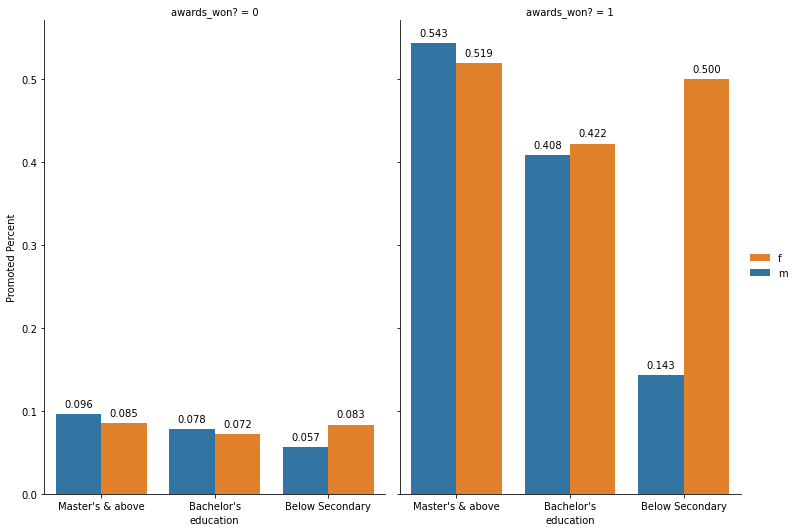

In [249]:
g = sns.FacetGrid(data_train2, col="awards_won?",height=7.5,aspect=.7)
g.map_dataframe(sns.barplot, x="education",y="is_promoted" ,  hue='gender',ci=None,palette=sns.color_palette())
g.add_legend()
g.set_ylabels('Promoted Percent')

for ax in g.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Awards won have asusual higher percentages

Females have higher percentages in awards won for all the education levels except Masters

Employees who won awards and with educational level of Below Secondary the females have a huge margin of being promoted over men

.

## Continuous Variables 

#### 1. Previous Year Ratings

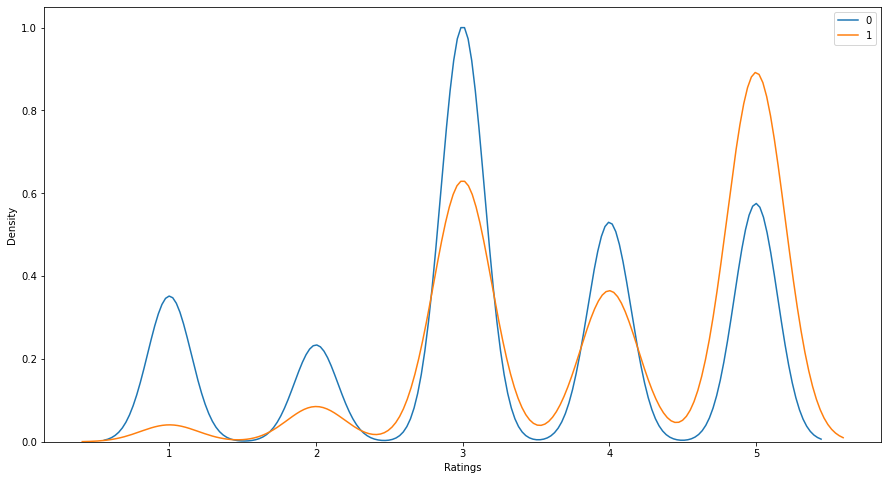

In [250]:
plt.figure(figsize=(15,8))
rating_0 = data_train2[data_train2['is_promoted']==0]['previous_year_rating']
rating_1 = data_train2[data_train2['is_promoted']==1]['previous_year_rating']


plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(rating_0,label='0')
sns.kdeplot(rating_1,label='1')
plt.xlabel('Ratings');
plt.legend()

One thing which noticable here is Employees with 3 ratings are higher than Employees with 4 ratings

#### 2. Number of Ratings

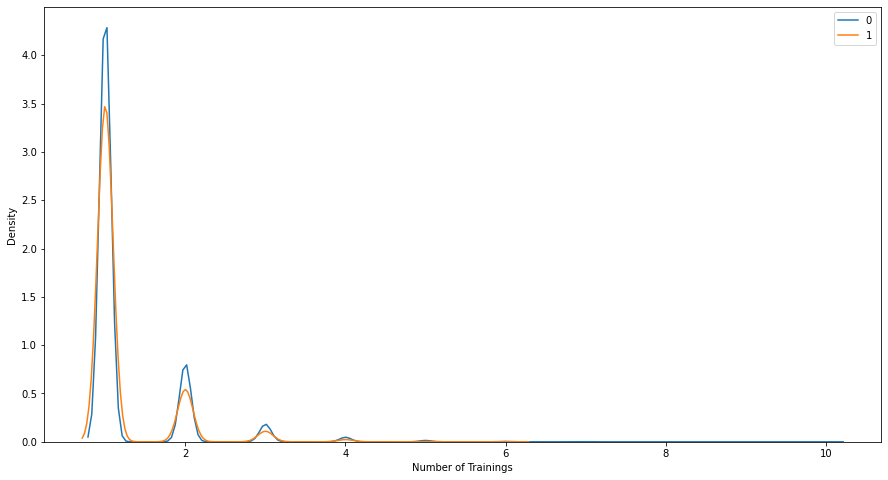

In [251]:
plt.figure(figsize=(15,8))
training_0 = data_train2[data_train2['is_promoted']==0]['no_of_trainings']
training_1 = data_train2[data_train2['is_promoted']==1]['no_of_trainings']


plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(training_0,label='0')
sns.kdeplot(training_1,label='1')
plt.xlabel('Number of Trainings');
plt.legend()

#### 3. Length of Service

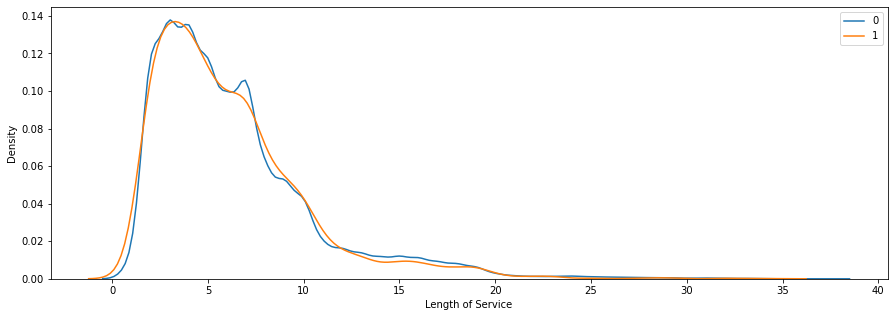

In [252]:
plt.figure(figsize=(15,5))
service_0 = data_train2[data_train2['is_promoted']==0]['length_of_service']
service_1 = data_train2[data_train2['is_promoted']==1]['length_of_service']


plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(service_0,label='0')
sns.kdeplot(service_1,label='1')
plt.xlabel('Length of Service');
plt.legend()

#### 4. Age

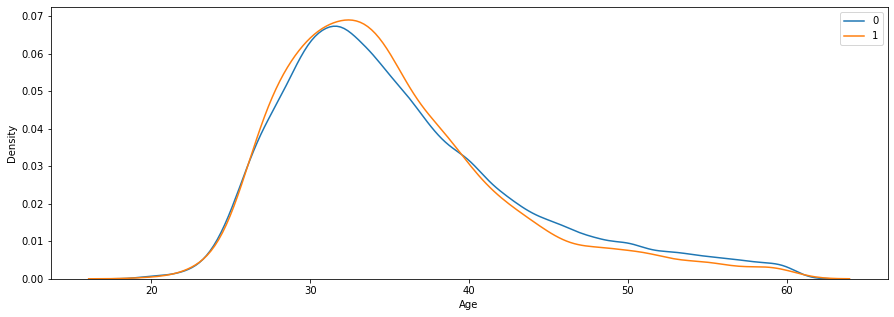

In [253]:
plt.figure(figsize=(15,5))
age_0 = data_train2[data_train2['is_promoted']==0]['age']
age_1 = data_train2[data_train2['is_promoted']==1]['age']


plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(age_0,label='0')
sns.kdeplot(age_1,label='1')
plt.xlabel('Age');
plt.legend()

# Preprocessing

In [254]:
train = data_train.copy()
test = data_test.copy()

## Dropping Columns 

In [256]:
train = train.drop(['employee_id','region'], axis=1)

In [257]:
test = test.drop(['employee_id','region'], axis=1)

In [258]:
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

## Train Test Split

In [259]:
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

In [260]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
print(f'Training Shape: {X_train.shape}')
print(f'Validation Shape: {X_val.shape}')

Training Shape: (43846, 10)
Validation Shape: (10962, 10)


In [349]:
X_train['previous_year_rating'] = X_train['previous_year_rating'].astype('float64')
X_val['previous_year_rating'] = X_val['previous_year_rating'].astype('float64')
test['previous_year_rating'] = test['previous_year_rating'].astype('float64')

## Imputations 

In [262]:
def missing_values(df):
  '''
  To print the count and percentage of missing values. Values with zero counts have been removed
  '''
  sum = df.isna().sum().sort_values(ascending= False)[df.isna().sum() > 0]
  percent = (sum/len(df))*100
  return pd.concat([sum,percent],axis=1, keys=['Sum','Percent'])

In [263]:
missing_values(train)

,Sum,Percent
previous_year_rating,4124,7.524449
education,2409,4.395344


In [264]:
missing_values(test)

,Sum,Percent
previous_year_rating,1812,7.713921
education,1034,4.401873


We'll impute numerical data with median values and categorical data with most_frequent(mode) values

In [265]:
imputer_cat = SimpleImputer(strategy= 'most_frequent')

In [266]:
imputer_cat.fit(X_train[category_list])

SimpleImputer(strategy='most_frequent')

In [267]:
X_train[category_list] = imputer_cat.transform(X_train[category_list])
X_val[category_list] = imputer_cat.transform(X_val[category_list])

In [268]:
test[category_list] = imputer_cat.transform(test[category_list])

In [269]:
imputer_num = SimpleImputer(strategy= 'median')

In [270]:
imputer_num.fit(X_train[num_list])

SimpleImputer(strategy='median')

In [271]:
X_train[num_list] = imputer_num.transform(X_train[num_list])
X_val[num_list] = imputer_num.transform(X_val[num_list])

In [272]:
test[num_list] = imputer_num.transform(test[num_list])

In [273]:
missing_values(X_train)

,Sum,Percent


In [274]:
missing_values(X_val)

,Sum,Percent


In [275]:
missing_values(test)

,Sum,Percent


There are no more missing values

## Dummification 

In [276]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

In [277]:
ohe_columns = ['department','gender','recruitment_channel','awards_won?']

In [278]:
ohe.fit(X_train[ohe_columns])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [279]:
onehot_col = list(ohe.get_feature_names(ohe_columns))
print(onehot_col)

['department_Finance', 'department_HR', 'department_Legal', 'department_Operations', 'department_Procurement', 'department_R&D', 'department_Sales & Marketing', 'department_Technology', 'gender_m', 'recruitment_channel_referred', 'recruitment_channel_sourcing', 'awards_won?_1']


This gives the list of columns after applying one hot encoding

In [280]:
X_train_ohe = ohe.transform(X_train[ohe_columns])
X_val_ohe = ohe.transform(X_val[ohe_columns])

In [281]:
X_train_ohe = pd.DataFrame(X_train_ohe.todense(), columns= onehot_col)
X_val_ohe = pd.DataFrame(X_val_ohe.todense(), columns= onehot_col)

In [282]:
test_ohe = ohe.transform(test[ohe_columns])

In [283]:
test_ohe = pd.DataFrame(test_ohe.todense(), columns= onehot_col)

In [284]:
X_train_ohe

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,awards_won?_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43841,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Ordinal Encoding 

In [285]:
ordinal_list = ['education', 'previous_year_rating']

In [286]:
edu_ranking = {"Master's & above": 3, "Bachelor's": 2, "Below Secondary": 1}

In [287]:
X_train['education'] = X_train['education'].map(edu_ranking)
X_val['education'] = X_val['education'].map(edu_ranking)

In [288]:
test['education'] = test['education'].map(edu_ranking)

In [289]:
X_train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
3872,Sales & Marketing,2,m,other,1.0,31.0,5.0,5.0,0,48.0
11619,Technology,3,m,sourcing,1.0,34.0,1.0,4.0,0,78.0
36178,Technology,2,m,other,3.0,29.0,4.0,4.0,0,77.0
29884,Sales & Marketing,3,m,other,1.0,54.0,4.0,15.0,0,47.0
22968,R&D,2,m,sourcing,1.0,31.0,5.0,6.0,0,86.0


In [290]:
X_train['education'].unique()

array([2, 3, 1])

In [291]:
X_train_ordinal = X_train[ordinal_list].reset_index(drop= True)
X_val_ordinal = X_val[ordinal_list].reset_index(drop= True)

In [292]:
test_ordinal = test[ordinal_list].reset_index(drop= True)

In [293]:
X_train_ordinal

,education,previous_year_rating
0,2,5.0
1,3,1.0
2,2,4.0
3,3,4.0
4,2,5.0
...,...,...
43841,3,3.0
43842,2,3.0
43843,2,5.0
43844,3,5.0


## Scaling 

In [294]:
scaler = StandardScaler()

In [295]:
scaler.fit(X_train[num_list])

StandardScaler()

In [296]:
X_train_num = pd.DataFrame(scaler.transform(X_train[num_list]), columns= num_list)
X_val_num = pd.DataFrame(scaler.transform(X_val[num_list]), columns= num_list)

In [297]:
test_num = pd.DataFrame(scaler.transform(test[num_list]), columns= num_list)

In [298]:
X_train_num

,no_of_trainings,age,length_of_service,avg_training_score
0,-0.417288,-0.495445,-0.204244,-1.150578
1,-0.417288,-0.105468,-0.437904,1.095756
2,2.855770,-0.755429,-0.437904,1.020878
3,-0.417288,2.494377,2.132359,-1.225456
4,-0.417288,-0.495445,0.029417,1.694779
...,...,...,...,...
43841,2.855770,0.154517,-0.437904,0.272100
43842,-0.417288,-1.015414,-1.138884,0.346978
43843,-0.417288,-0.105468,0.263077,0.122345
43844,2.855770,0.024524,-0.671564,1.694779


## Merging 

In [299]:
X_train = pd.concat([X_train_num, X_train_ordinal, X_train_ohe], axis= 1)
X_val = pd.concat([X_val_num, X_val_ordinal, X_val_ohe], axis= 1)

In [300]:
test = pd.concat([test_num, test_ordinal, test_ohe], axis= 1)

In [301]:
X_train.head()

,no_of_trainings,age,length_of_service,avg_training_score,education,previous_year_rating,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,awards_won?_1
0,-0.417288,-0.495445,-0.204244,-1.150578,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.417288,-0.105468,-0.437904,1.095756,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2.855770,-0.755429,-0.437904,1.020878,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.417288,2.494377,2.132359,-1.225456,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.417288,-0.495445,0.029417,1.694779,2,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [302]:
print(f'Final Training Data Shape: {X_train.shape}')
print(f'Final Validation Data Shape: {X_val.shape}')
print(f'Final Test Data Shape: {test.shape}')

Final Training Data Shape: (43846, 18)
Final Validation Data Shape: (10962, 18)
Final Test Data Shape: (23490, 18)


In [303]:
print(f'Final Training Target Shape: {y_train.shape}')
print(f'Final Valiadtion Target Shape: {y_val.shape}')

Final Training Target Shape: (43846,)
Final Valiadtion Target Shape: (10962,)


# Model Building

In [304]:
def eval(y_train, y_train_pred, y_val, y_val_pred):
    print(f'Accuracy on training data:\t {accuracy_score(y_train, y_train_pred)}')
    print(f'Accuracy on validation data:\t {accuracy_score(y_val, y_val_pred)} \n')
    
    print(f'Precision on training data:\t {precision_score(y_train, y_train_pred)}')
    print(f'Precision on validation data:\t {precision_score(y_val, y_val_pred)} \n')
    
    print(f'Recall on training data:\t {recall_score(y_train, y_train_pred)}')
    print(f'Recall on validation data:\t {recall_score(y_val, y_val_pred)} \n')
    
    print(f'F1 score on training data:\t {f1_score(y_train, y_train_pred)}')
    print(f'F1 score on validation data:\t {f1_score(y_val, y_val_pred)} \n')

In [305]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Val_Accuracy',
                               'Train_Precision','Val_Precision',
                               'Train_Recall', 'Val_Recall',
                               'Train_F1', 'Val_F1'])

def get_metrics(y_train, y_train_pred, y_val, y_val_pred, model_description, dataframe):

    train_accuracy = round(accuracy_score(y_true= y_train, y_pred= y_train_pred),3)
    train_precision = round(precision_score(y_true= y_train, y_pred= y_train_pred),3)
    train_recall = round(recall_score(y_true= y_train, y_pred= y_train_pred),3)
    train_f1 = round(f1_score(y_true= y_train, y_pred= y_train_pred),3)
    
    val_accuracy = round(precision_score(y_true= y_val, y_pred= y_val_pred),3)
    val_precision = round(precision_score(y_true= y_val, y_pred= y_val_pred),3)
    val_recall = round(recall_score(y_true= y_val, y_pred= y_val_pred),3)
    val_f1 = round(f1_score(y_true= y_val, y_pred= y_val_pred),3)

    dataframe = dataframe.append(pd.Series([model_description, train_accuracy, val_accuracy, 
                                            train_precision, val_precision, 
                                            train_recall, val_recall, 
                                            train_f1, val_f1],index=scores.columns ), 
                                 ignore_index=True)

    return(dataframe)

## Logistic Regression 

In [389]:
lr = LogisticRegressionCV(cv= 3)

In [390]:
lr.fit(X_train, y_train)

LogisticRegressionCV(cv=3)

In [391]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [392]:
eval(y_train, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9385576791497514
Accuracy on validation data:	 0.9386060937785076 

Precision on training data:	 0.9594827586206897
Precision on validation data:	 0.9467680608365019 

Recall on training data:	 0.29601063829787233
Recall on validation data:	 0.27422907488986786 

F1 score on training data:	 0.45243902439024386
F1 score on validation data:	 0.4252775405636209 



Even though the accuracy score is good the recall score has been affected.

This is because of class imbalance. As we have checked above the count of employees promoted constitute only about 8% of the records

The model becomes biased and makes many negative predictions as their count is high.

Thus increasing the False Negative count and recall gets affected.

Recall = TP/(TP + FN)

In [393]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Logistic Regression', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425


### Smote

In [394]:
smote = SMOTE(random_state= 42)

In [395]:
print(f'Target before smote: \n{y_train.value_counts()}')

Target before smote: 
0    40086
1     3760
Name: is_promoted, dtype: int64


In [396]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

We never apply SMOTE(oversampling) on Validation or Test data

In [397]:
print(f'Target after smote: \n{y_train_sm.value_counts()}')

Target after smote: 
0    40086
1    40086
Name: is_promoted, dtype: int64


## Logistic Regression (Smote) 

In [398]:
lr_sm = LogisticRegressionCV(cv= 3)

In [399]:
lr_sm.fit(X_train_sm, y_train_sm)

LogisticRegressionCV(cv=3)

In [400]:
y_train_pred = lr_sm.predict(X_train_sm)
y_val_pred = lr_sm.predict(X_val)

In [401]:
eval(y_train_sm, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.7123684079229656
Accuracy on validation data:	 0.740467068053275 

Precision on training data:	 0.7305421654119049
Precision on validation data:	 0.19047619047619047 

Recall on training data:	 0.6729531507259392
Recall on validation data:	 0.6563876651982379 

F1 score on training data:	 0.7005661455357606
F1 score on validation data:	 0.29526876393361406 



On SMOTE data the recall score has improved but precision on validation data has been affected

Because when we apply smote to training data it oversamples and makes target class of equal count thus removing the class imbalance issue.

But in reality the target class has class imbalance data i.e in our case even though we oversample the training data the actual number of people getting promoted will still be around 8% of the total records.
So the SMOTE produces good results on training data but couldn't achieve it on validation. Validation still has the class imbalance target. The validation records represent the real data.

Training on SMOTE data creates many false positive predictions as the model takes target classes to be in 50-50 proportion but in reality its not that way thus affecting Precision.

Precision = TP/(TP + FP)

We need to explore more methods in order to address these issues.

In [402]:
scores = get_metrics(y_train_sm, y_train_pred, y_val, y_val_pred, 'Logistic Regression Smote', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295


## Random Forest

In [403]:
rf = RandomForestClassifier(random_state= 42)

In [404]:
param_grid = {"criterion": ['gini','entropy'],
              "n_estimators": [100,150,200],
              "min_samples_split": [2,7],
              "max_depth": [0,6],
              "min_samples_leaf": [1,6],
              'ccp_alpha' : [0.001,0.01,0.1]
             }

In [405]:
rf_grid = GridSearchCV(rf, param_grid, cv= 3)

In [406]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'], 'max_depth': [0, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200]})

In [407]:
rf_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [408]:
y_train_pred = rf_grid.predict(X_train)
y_val_pred = rf_grid.predict(X_val)

In [409]:
eval(y_train, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9229576244127172
Accuracy on validation data:	 0.9260171501550812 

Precision on training data:	 0.9098712446351931
Precision on validation data:	 0.9145299145299145 

Recall on training data:	 0.1127659574468085
Recall on validation data:	 0.11784140969162996 

F1 score on training data:	 0.2006625650733554
F1 score on validation data:	 0.20878048780487804 



In [410]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Random Forest', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209


## Random Forest (Feature Selection) 

In [411]:
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
ind_att_names = X_train.columns
imp_df = pd.DataFrame([ind_att_names[indices], np.sort(importances)[::-1]])

In [412]:
pd. set_option("display.max_columns", None)
imp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,avg_training_score,awards_won?_1,previous_year_rating,department_Sales & Marketing,department_Operations,department_Technology,age,education,department_Procurement,no_of_trainings,department_HR,length_of_service,gender_m,recruitment_channel_referred,department_Legal,department_Finance,department_R&D,recruitment_channel_sourcing
1,0.503588,0.212801,0.204597,0.035051,0.010993,0.008844,0.005018,0.004095,0.003911,0.002911,0.00289,0.00133,0.0013,0.000944,0.000855,0.000419,0.000387,0.000067


In [413]:
col = ['avg_training_score','awards_won?_1','previous_year_rating','age','education','no_of_trainings',
       'length_of_service','gender_m']

In [414]:
X_train_f = X_train[col]
X_val_f = X_val[col]
y_train_f = y_train
y_val_f = y_val

In [415]:
rf = RandomForestClassifier(random_state= 42)
param_grid = {"criterion": ['gini','entropy'],
              "n_estimators": [100,150,200],
              "min_samples_split": [2,7],
              "max_depth": [0,6],
              "min_samples_leaf": [1,6],
              'ccp_alpha' : [0.001,0.01,0.1]
             }

rf_grid = GridSearchCV(rf, param_grid, cv= 3)

In [416]:
rf_grid.fit(X_train_f, y_train_f)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'], 'max_depth': [0, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200]})

In [417]:
rf_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [418]:
y_train_pred = rf_grid.predict(X_train_f)
y_val_pred = rf_grid.predict(X_val_f)

In [419]:
eval(y_train_f, y_train_pred, y_val_f, y_val_pred)

Accuracy on training data:	 0.9225470966564795
Accuracy on validation data:	 0.9258347016967706 

Precision on training data:	 0.8760330578512396
Precision on validation data:	 0.8925619834710744 

Recall on training data:	 0.1127659574468085
Recall on validation data:	 0.11894273127753303 

F1 score on training data:	 0.1998114985862394
F1 score on validation data:	 0.2099125364431487 



In [420]:
scores = get_metrics(y_train_f, y_train_pred, y_val_f, y_val_pred, 'Random Forest Features', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210


## Random Forest (Smote) 

In [421]:
rf = RandomForestClassifier(random_state= 42)

In [422]:
param_grid = {"criterion": ['gini','entropy'],
              "n_estimators": [100,150,200,250],
              "min_samples_split": [2,7],
              "max_depth": [0,6],
              "min_samples_leaf": [1,6],
              'ccp_alpha' : [0.001,0.01,0.1]
             }

In [423]:
rf_grid = GridSearchCV(rf, param_grid, cv= 3)

In [424]:
rf_grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'], 'max_depth': [0, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200, 250]})

In [425]:
rf_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [426]:
y_train_pred = rf_grid.predict(X_train_sm)
y_val_pred = rf_grid.predict(X_val)

In [427]:
eval(y_train_sm, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.7542034625555056
Accuracy on validation data:	 0.8376208721036307 

Precision on training data:	 0.8297734627831715
Precision on validation data:	 0.2625272331154684 

Recall on training data:	 0.6396248066656688
Recall on validation data:	 0.5308370044052864 

F1 score on training data:	 0.7223959654016285
F1 score on validation data:	 0.3513119533527696 



In [428]:
scores = get_metrics(y_train_sm, y_train_pred, y_val, y_val_pred, 'Random Forest Smote', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210
5,Random Forest Smote,0.754,0.263,0.830,0.263,0.640,0.531,0.722,0.351


## XGBoost

In [429]:
xgb_cl = xgb.XGBClassifier(random_state = 42)

In [430]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [431]:
xgb_grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3)

In [432]:
xgb_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]})

In [433]:
y_train_pred = xgb_grid_cv.predict(X_train)
y_val_pred = xgb_grid_cv.predict(X_val)

In [434]:
eval(y_train, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9433015554440541
Accuracy on validation data:	 0.9427111840904945 

Precision on training data:	 0.967008797653959
Precision on validation data:	 0.926829268292683 

Recall on training data:	 0.35079787234042553
Recall on validation data:	 0.33480176211453744 

F1 score on training data:	 0.514832162373146
F1 score on validation data:	 0.4919093851132686 



In [435]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'XGBoost', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210
5,Random Forest Smote,0.754,0.263,0.830,0.263,0.640,0.531,0.722,0.351
6,XGBoost,0.943,0.927,0.967,0.927,0.351,0.335,0.515,0.492


## XGBoost (Smote) 

In [436]:
xgb_cl = xgb.XGBClassifier(random_state = 42)

In [437]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [438]:
xgb_grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3)

In [439]:
xgb_grid_cv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]})

In [440]:
y_train_pred = xgb_grid_cv.predict(X_train_sm)
y_val_pred = xgb_grid_cv.predict(X_val)

In [441]:
eval(y_train_sm, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9566556902659282
Accuracy on validation data:	 0.9360518153621602 

Precision on training data:	 0.9925997685745809
Precision on validation data:	 0.7674418604651163 

Recall on training data:	 0.9201716309933643
Recall on validation data:	 0.32709251101321585 

F1 score on training data:	 0.9550144342175101
F1 score on validation data:	 0.4586872586872587 



In [442]:
scores = get_metrics(y_train_sm, y_train_pred, y_val, y_val_pred, 'XGBoost Smote', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210
5,Random Forest Smote,0.754,0.263,0.830,0.263,0.640,0.531,0.722,0.351
6,XGBoost,0.943,0.927,0.967,0.927,0.351,0.335,0.515,0.492
7,XGBoost Smote,0.957,0.767,0.993,0.767,0.920,0.327,0.955,0.459


## Gradient Boosting Classfier 

In [443]:
gb = GradientBoostingClassifier(random_state= 42)

In [444]:
param_grid = {
              "n_estimators": [100,150,200,250],
              "min_samples_split": [2,7],
              "max_depth": [0,6],
              "min_samples_leaf": [1,6]
             }

In [445]:
gb_grid = GridSearchCV(gb, param_grid, n_jobs=-1, cv=3)

In [446]:
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [0, 6], 'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200, 250]})

In [447]:
y_train_pred = gb_grid.predict(X_train)
y_val_pred = gb_grid.predict(X_val)

In [448]:
eval(y_train, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9448524380787301
Accuracy on validation data:	 0.9424375114030287 

Precision on training data:	 0.9738700564971752
Precision on validation data:	 0.9159159159159159 

Recall on training data:	 0.36675531914893617
Recall on validation data:	 0.33590308370044053 

F1 score on training data:	 0.5328438948995363
F1 score on validation data:	 0.49153908138597907 



In [449]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Gradient Boosting', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210
5,Random Forest Smote,0.754,0.263,0.830,0.263,0.640,0.531,0.722,0.351
6,XGBoost,0.943,0.927,0.967,0.927,0.351,0.335,0.515,0.492
7,XGBoost Smote,0.957,0.767,0.993,0.767,0.920,0.327,0.955,0.459
8,Gradient Boosting,0.945,0.916,0.974,0.916,0.367,0.336,0.533,0.492


## Gradient Boosting Classifier (Smote) 

In [450]:
gb = GradientBoostingClassifier(random_state= 42)

In [451]:
param_grid = {
              "n_estimators": [100,150,200,250],
              "min_samples_split": [2,7],
              "max_depth": [0,6],
              "min_samples_leaf": [1,6]
             }

In [452]:
gb_grid = GridSearchCV(gb, param_grid, n_jobs=-1, cv=3)

In [453]:
gb_grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [0, 6], 'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200, 250]})

In [454]:
y_train_pred = gb_grid.predict(X_train_sm)
y_val_pred = gb_grid.predict(X_val)

In [455]:
eval(y_train_sm, y_train_pred, y_val, y_val_pred)

Accuracy on training data:	 0.9674824128124532
Accuracy on validation data:	 0.9420726144864076 

Precision on training data:	 0.9977951919245583
Precision on validation data:	 0.886685552407932 

Recall on training data:	 0.9370353739460161
Recall on validation data:	 0.3447136563876652 

F1 score on training data:	 0.9664612574133873
F1 score on validation data:	 0.49643140364789856 



In [456]:
scores = get_metrics(y_train_sm, y_train_pred, y_val, y_val_pred, 'Gradient Boosting Smote', scores)
scores

,Model,Train_Accuracy,Val_Accuracy,Train_Precision,Val_Precision,Train_Recall,Val_Recall,Train_F1,Val_F1
0,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
1,Logistic Regression,0.939,0.947,0.959,0.947,0.296,0.274,0.452,0.425
2,Logistic Regression Smote,0.712,0.190,0.731,0.190,0.673,0.656,0.701,0.295
3,Random Forest,0.923,0.915,0.910,0.915,0.113,0.118,0.201,0.209
4,Random Forest Features,0.923,0.893,0.876,0.893,0.113,0.119,0.200,0.210
5,Random Forest Smote,0.754,0.263,0.830,0.263,0.640,0.531,0.722,0.351
6,XGBoost,0.943,0.927,0.967,0.927,0.351,0.335,0.515,0.492
7,XGBoost Smote,0.957,0.767,0.993,0.767,0.920,0.327,0.955,0.459
8,Gradient Boosting,0.945,0.916,0.974,0.916,0.367,0.336,0.533,0.492
9,Gradient Boosting Smote,0.967,0.887,0.998,0.887,0.937,0.345,0.966,0.496


From the above table we can see that XGBoost has produced descent F1 score and also all the rest of the scores are good. Also the values do not represent any overfitting

So we'll select XGBoost on regular data(without smote) to predict values for test data

# Test Predictions

In [457]:
xgb_cl = xgb.XGBClassifier(random_state = 42)
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3)

In [458]:
xgb_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]})

In [459]:
test_pred = xgb_grid_cv.predict(test)

In [460]:
test_pred

array([0, 0, 0, ..., 0, 0, 1])